<a href="https://colab.research.google.com/github/jiwoo0212/kakao_arena_Melon_Playlist_Continuation_struggle/blob/master/week1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 투빅스 15기 정규세션 Week1 EDA - 15기 강지우

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 1. 데이터 불러오기

#### 데이터 설명
##### datetime:
hourly date + timestamp 날짜+시간

##### season:
1 = spring, 2 = summer, 3 = fall, 4 = winter 봄/여름/가을/겨울

##### holiday:
whether the day is considered a holiday 공휴일

##### workingday:
whether the day is neither a weekend nor holiday 주중&공휴일x 

##### weather:
1: Clear, Few clouds, Partly cloudy, Partly cloudy 맑음

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 안개

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered 
clouds 적은 강수량

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 높은 강수량

##### temp:
temperature in Celsius 온도

##### atemp:
--"feels like" temperature in Celsius 체감온도

##### humidity:
relative humidity 습도

##### windspeed:
wind speed 풍속

##### casual:
number of non registered user rentals initiated 비회원 렌탈 수

##### registered:
number of registered user rentals initiated 회원 렌탈 수

##### count:
number of total rentals 총 렌탈 수 = 비회원 렌탈 수 + 회원 렌탈 수 

In [ ]:
dat = pd.read_csv('과제데이터.csv', encoding='UTF8')

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
print(str(10886/24)+'일의 데이터')
#start date
print(dat.iloc[0,0])
#end date
print(dat.iloc[-1,0])

453.5833333333333일의 데이터
2011-01-01 00:00:00
2012-12-19 23:00:00


In [ ]:
dat.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
print('data shape: {}'.format(dat.shape))

data shape: (10886, 12)


### 가설
계절별로 렌탈수 차이 있을 것이다.

비오는 날에 렌탈 수가 적을 것이다.

풍속이 세면 렌탈 수가 적을 것이다.

주말에 렌탈 수가 더 많을 것이다.

온도가 극히 낮고 높은 날에 렌탈 수가 적을 것이다.

출퇴근 시간에 렌탈 수가 많을 것이다.

## 2. 데이터
## Target Variable = count

In [ ]:
dat.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 범주형 변수 분석

In [ ]:
print('season: {}'.format(len(np.unique(dat.season))))
print('weather: {}'.format(len(np.unique(dat.weather))))
print('holiday: {}'.format(len(np.unique(dat.holiday))))
print('workingday: {}'.format(len(np.unique(dat.workingday))))

season: 4
weather: 4
holiday: 2
workingday: 2


Variable|Unique|Explanation
:-|:-|:-
season|4|계절
weather|4|날씨 4단계
holiday|2|공휴일 0 or 1
workingday|2|공휴일x 주말x 0 or 1

### 결측치 확인

In [ ]:
dat.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 수치형 변수 이상치 분석

In [ ]:
num_att = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
dat[num_att].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Text(0.5, 0.98, 'outlier 제거 전 연속형 변수 히스토그램')

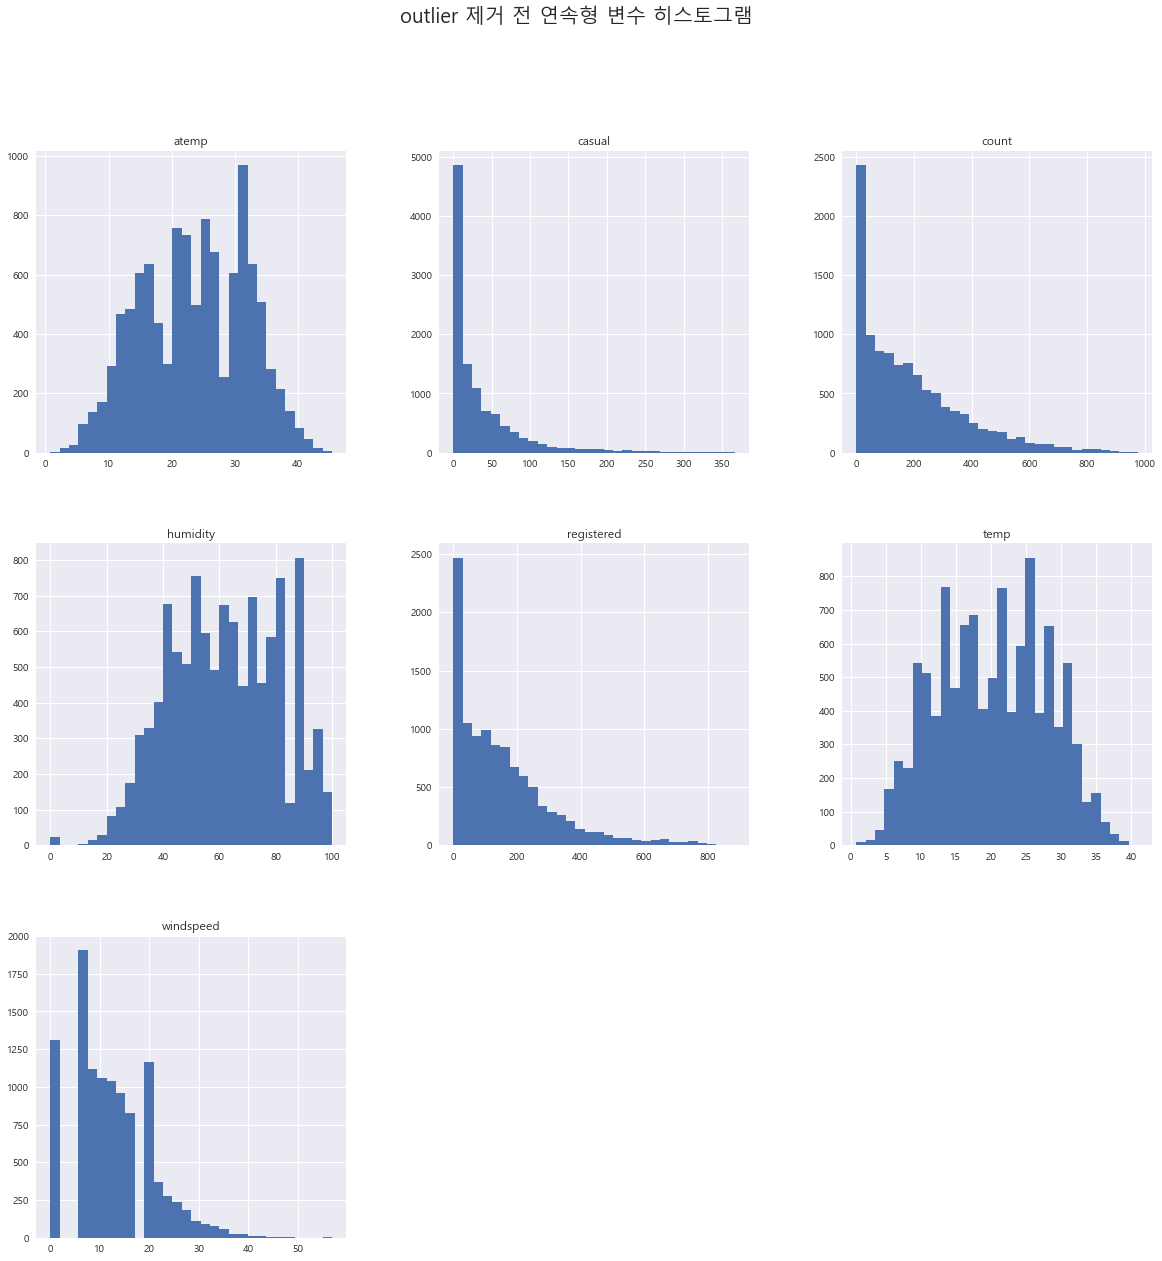

In [ ]:
dat[num_att].hist(bins=30, figsize=(20,20))
plt.suptitle('outlier 제거 전 연속형 변수 히스토그램', fontsize=20)

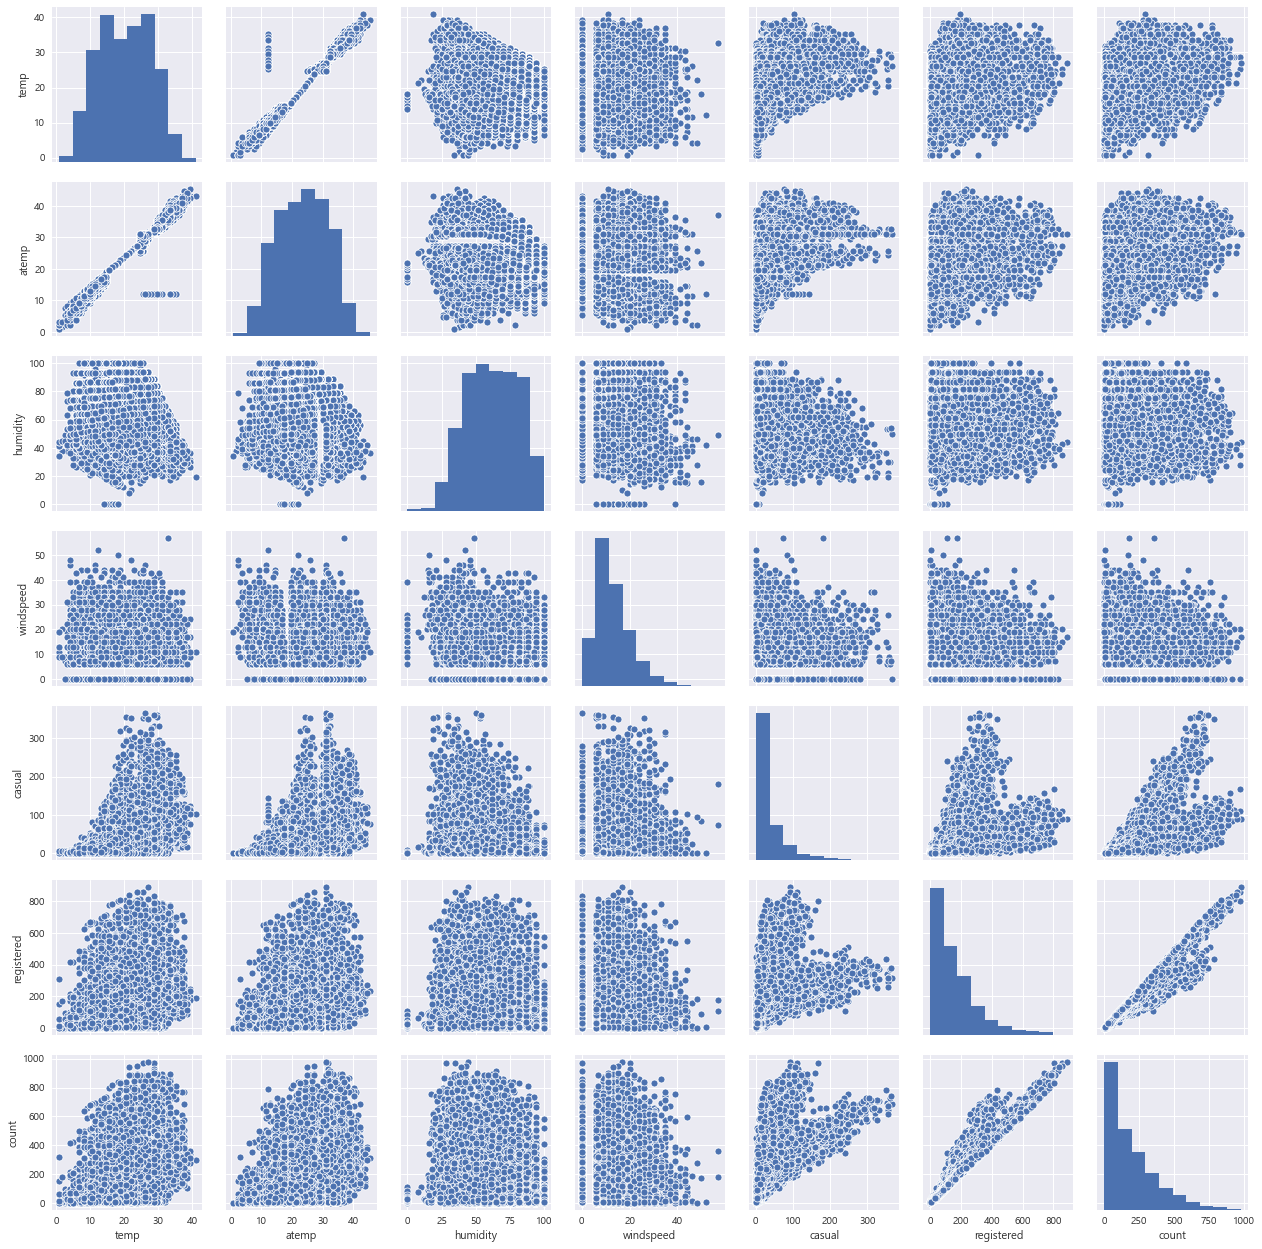

In [ ]:
sns.pairplot(dat[num_att])

하루에 데이터가 24개씩 존재. 파악하기 힘들다. 
24개씩 묶은 데이터 생성

### 시간별 데이터 -> 일별 데이터

In [ ]:
dat_group_by_day = dat
dat_group_by_day['datetime'] = pd.to_datetime(dat_group_by_day['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
dat_group_by_day.index = dat_group_by_day['datetime']

In [ ]:
dat_group_by_day_ =  dat_group_by_day.groupby(pd.Grouper(freq='D'))[dat.columns].mean()

일별데이터 hist

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B155B0B708>,
      dtype=object)

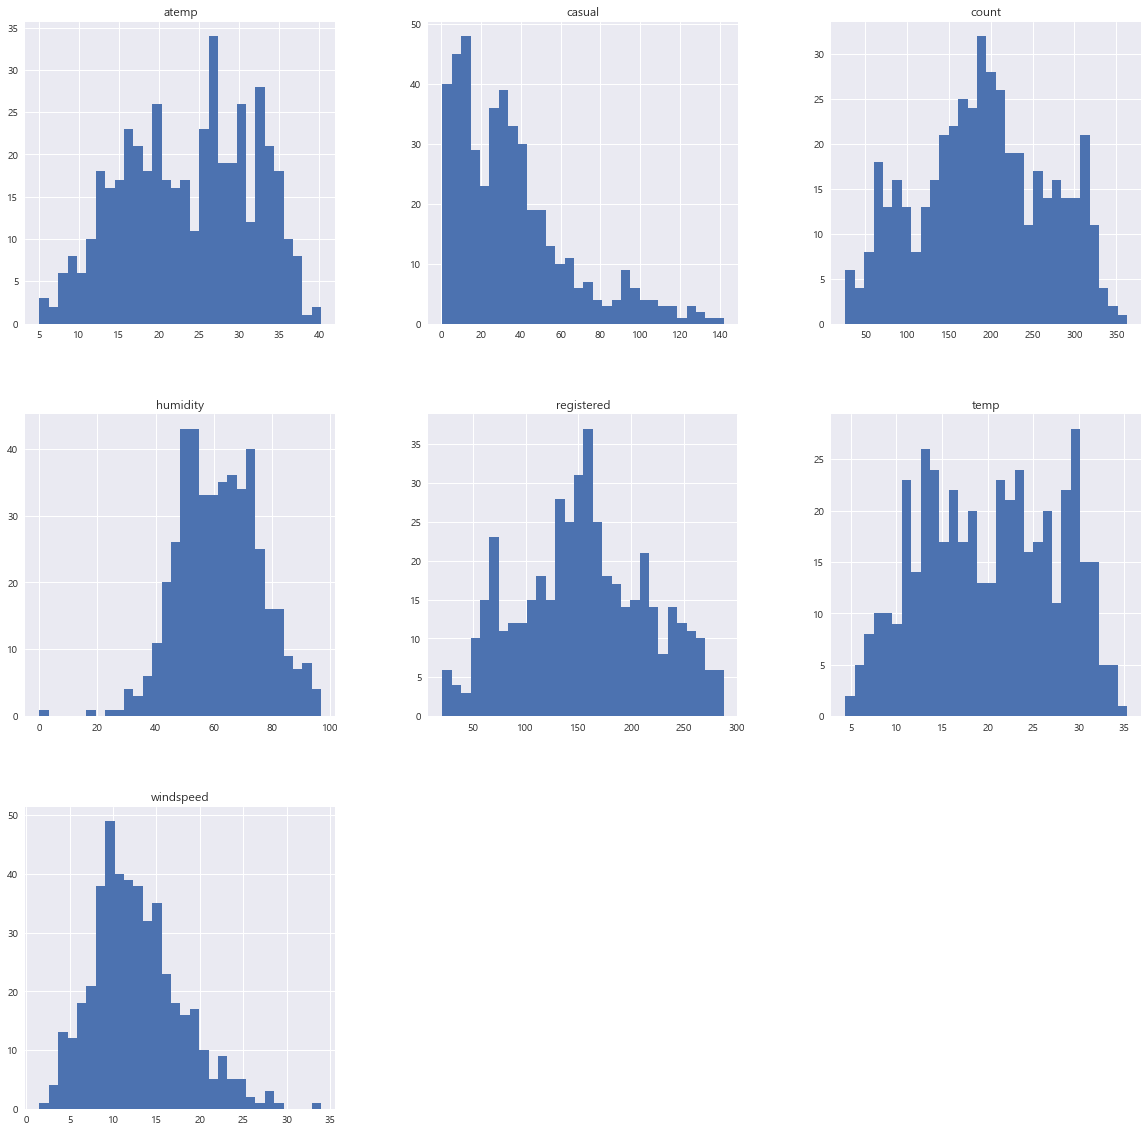

In [ ]:
dat_group_by_day_[num_att].hist(bins=30, figsize=(20,20))

일별데이터 pair plot

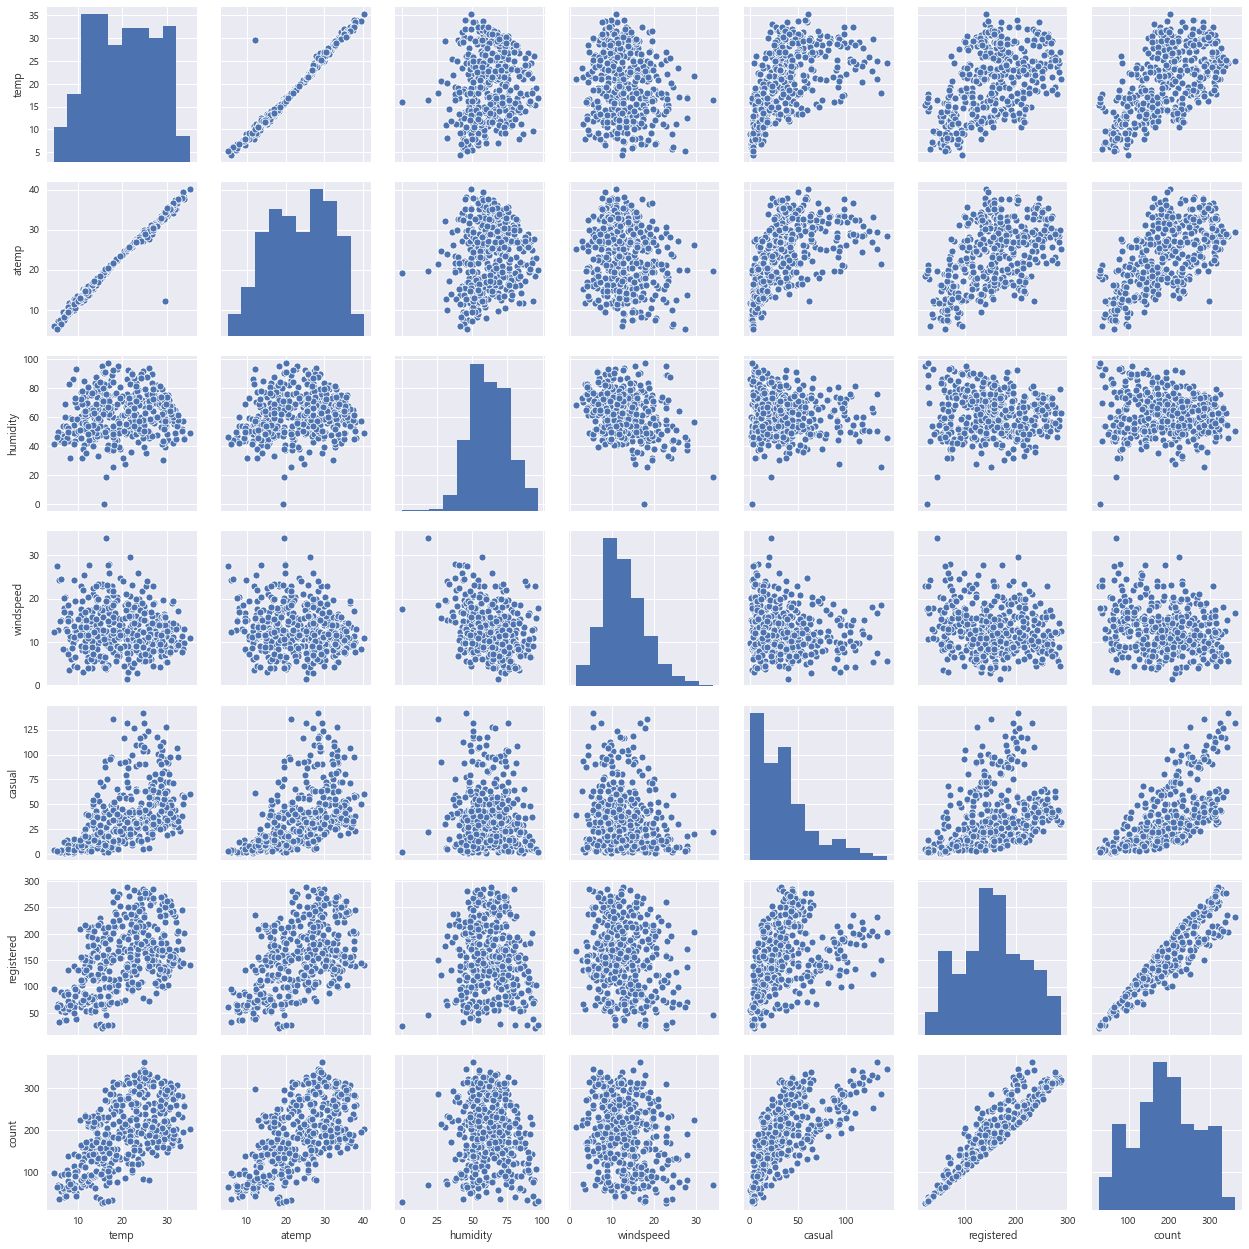

In [ ]:
sns.pairplot(dat_group_by_day_[num_att])

In [ ]:
dat[num_att].corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


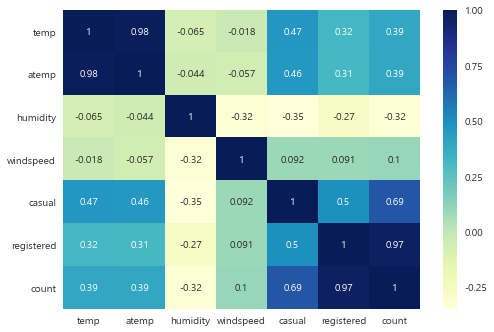

In [ ]:
sns.heatmap(dat[num_att].corr(),cmap='YlGnBu', annot=True)
plt.show()

temp와 atemp는 선형적인 관계가 아니다. 
기온이 극히 높은 경우/ 낮은 경우일 때를 나타낼 수 있는 변수를 추가

### temp와 atemp의 파생변수 생성

temp와 atemp 분포파악 후 파생변수 생성 기준점 결정

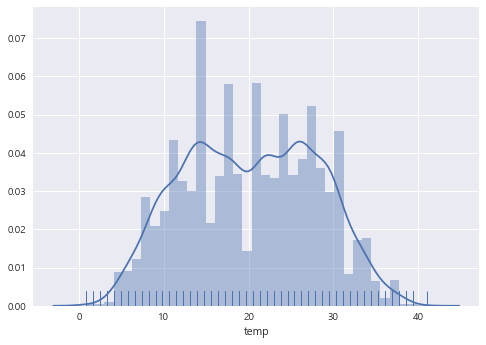

In [ ]:
sns.distplot(dat['temp'], kde=True, rug=True)

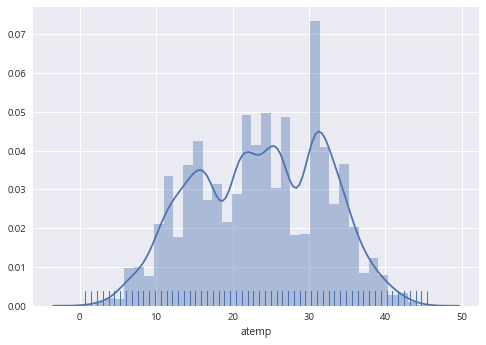

In [ ]:
sns.distplot(dat['atemp'], kde=True, rug=True)

In [ ]:
dat['temp'].mean() + 2*dat['temp'].std()

35.814039507927184

고온/저온을 1.5시그마를 벗어나는 값으로 설정

In [ ]:
dat['high_temp'] = 0
dat['low_temp'] = 0
dat['high_atemp'] = 0
dat['low_atemp'] = 0

dat.loc[dat['temp']>dat['temp'].mean() + 2*dat['temp'].std(), 'high_temp'] = 1
dat.loc[dat['temp']<dat['temp'].mean() - 2*dat['temp'].std(), 'low_temp'] = 1

dat.loc[dat['atemp']>dat['atemp'].mean() + 2*dat['atemp'].std(), 'high_atemp'] = 1
dat.loc[dat['atemp']<dat['atemp'].mean() - 2*dat['atemp'].std(), 'low_atemp'] = 1

#### high temp일때 사용자 수 비교
고온일 때 사용자수가 적을 것이라 예상했으나 매우 뚜렷한 차이를 보이진 않는다.

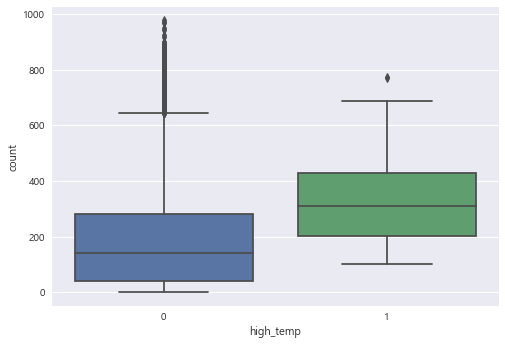

In [ ]:
sns.boxplot(y = "count", x = "high_temp", data = dat)

plt.show()

박스플롯에서 오히려 high temp가 더 count가 높아서 자세히 살펴보니 아래와 같았다.

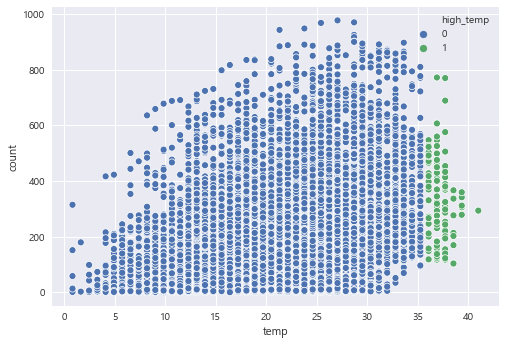

In [ ]:
ax = sns.scatterplot(x='temp', y='count',hue='high_temp',data=dat)

#### low temp일 때 사용자수 비교
low temp일때 사용자수가 적음을 볼 수 있다.

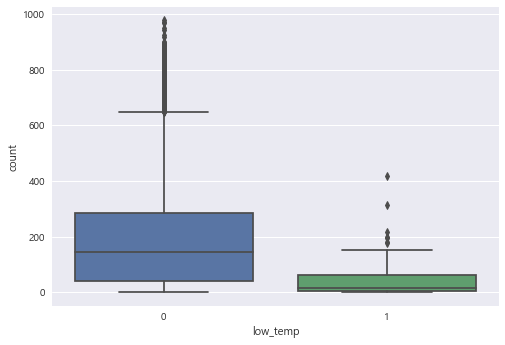

In [ ]:
sns.boxplot(y = "count", x = "low_temp", data = dat)

plt.show()

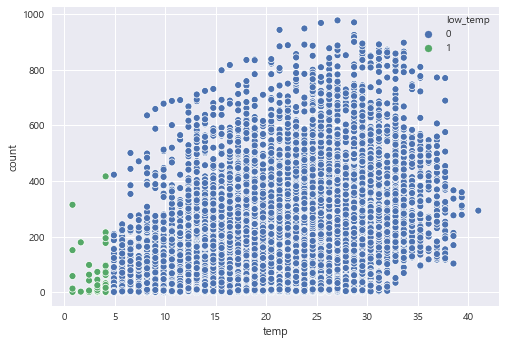

In [ ]:
ax = sns.scatterplot(x='temp', y='count',hue='low_temp',data=dat)

### 계절별 평균 이용자 수 

Text(0.5, 0.98, '계절별 평균 이용자')

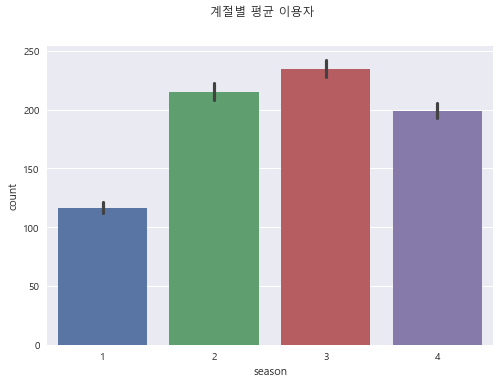

In [ ]:
sns.barplot(x='season', y='count', data=dat)
plt.suptitle('계절별 평균 이용자')

봄 이용자 수가 다른 계절 이용자 수에 비해 확연히 낮다.

### 년도별 평균 이용자 수

Text(0.5, 0.98, '년도별 평균 이용자')

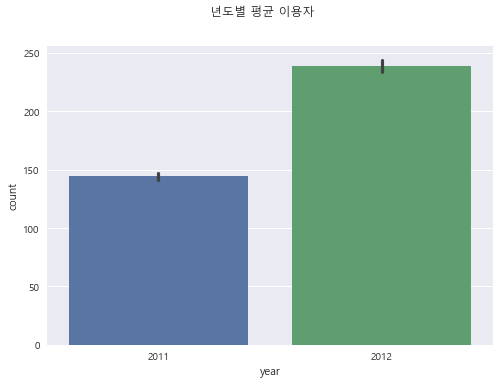

In [ ]:
dat['datetime'] = pd.to_datetime(dat['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')
dat['year'] = dat['datetime'].dt.year
sns.barplot(x='year', y='count', data=dat)
plt.suptitle('년도별 평균 이용자')

### 월별 평균 이용자 수

Text(0.5, 0.98, '월별 평균 이용자')

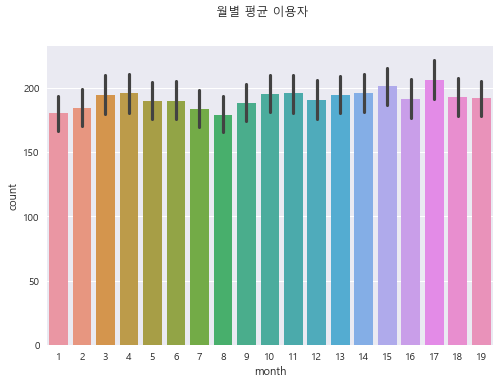

In [ ]:
dat['datetime'] = pd.to_datetime(dat['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')
dat['month'] = dat['datetime'].dt.day

sns.barplot(x='month', y='count', data=dat)
plt.suptitle('월별 평균 이용자')

### 평일 평균 이용자

Text(0.5, 0.98, '평일 평균 이용자')

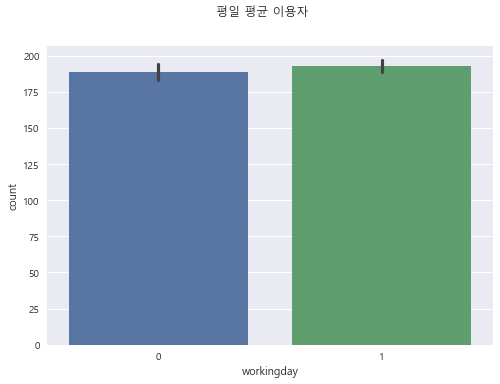

In [ ]:
sns.barplot(x='workingday', y='count', data=dat)
plt.suptitle('평일 평균 이용자')

### 공휴일 평균 이용자

Text(0.5, 0.98, '공휴일 평균 이용자')

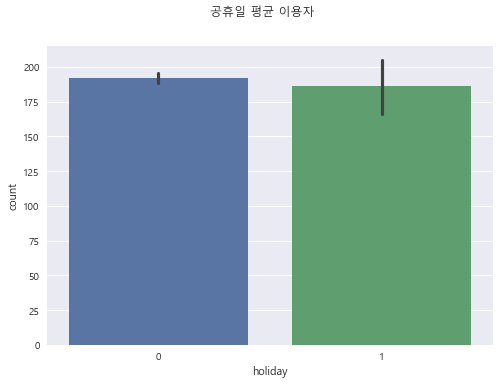

In [ ]:
sns.barplot(x='holiday', y='count', data=dat)
plt.suptitle('공휴일 평균 이용자')

### 날씨별 이용자 수

Text(0.5, 0.98, '날씨별 평균 이용자')

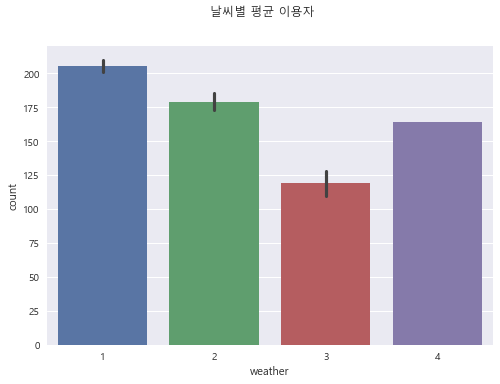

In [ ]:
sns.barplot(x='weather', y='count', data=dat)
plt.suptitle('날씨별 평균 이용자')

1: Clear, Few clouds, Partly cloudy, Partly cloudy 맑음

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 안개

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered 
clouds 적은 강수량

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 높은 강수량

4번 날씨의 이용자수가 저조할 것이라고 예상했으나 3번 날씨의 이용자수가 가장 저조했다.

확연히 기상상태가 안좋은 3과 4를 같은 범주로 배정 후  다시 파악해본다.

Text(0.5, 0.98, '날씨별 평균 이용자')

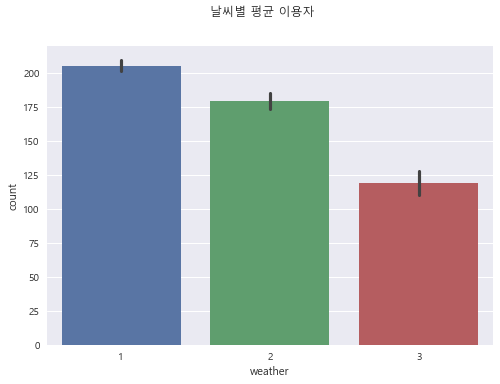

In [ ]:
dat_weather_merge = dat
dat_weather_merge.loc[dat_weather_merge['weather']==4, 'weather'] = 3
sns.barplot(x='weather', y='count', data=dat)
plt.suptitle('날씨별 평균 이용자')

### 시간대별 이용자수 비교

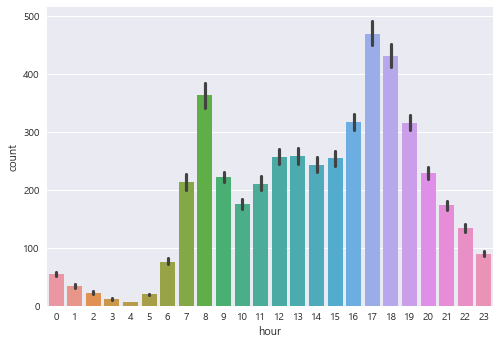

In [ ]:
dat['datetime'] = pd.to_datetime(dat['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')
dat['hour'] = dat['datetime'].dt.hour
sns.barplot(x='hour', y='count', data=dat)

Text(0.5, 0.98, '출근 시간 비교')

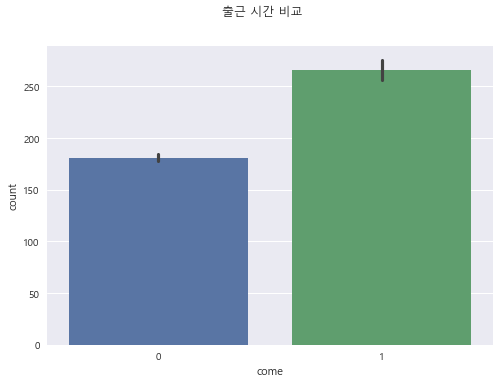

In [ ]:
dat_comm_merge = dat
dat_comm_merge['come'] = 0
dat_comm_merge.loc[dat_comm_merge['hour'].isin([7,8,9]), 'come'] = 1
sns.barplot(x='come', y='count', data=dat)
plt.suptitle('출근 시간 비교')

Text(0.5, 0.98, '퇴근 시간 비교')

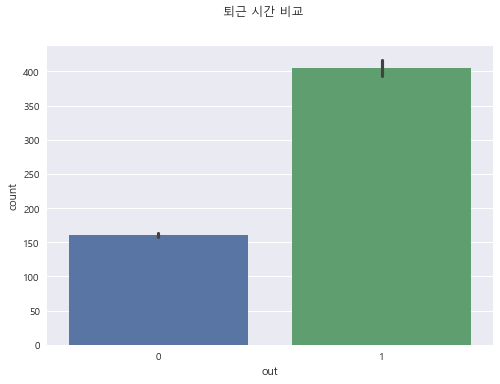

In [ ]:
dat_comm_merge = dat
dat_comm_merge['out'] = 0
dat_comm_merge.loc[dat_comm_merge['hour'].isin([17,18,19]), 'out'] = 1
sns.barplot(x='out', y='count', data=dat)
plt.suptitle('퇴근 시간 비교')

출퇴근 시간에 확연히 이용자 수가 늘어나는 것을 볼 수 있다.